# Import essential packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import metrics  
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import and Inspect dataset

In [2]:
path = 'https://raw.githubusercontent.com/BaoLeQuang178/Personal-Loan-Prediction/main/Bank_Personal_Loan_Modelling.csv'
df = pd.read_csv(path) 

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 5000 rows and 14 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
print('Number of missing values by column:')
df.isnull().sum()

Number of missing values by column:


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.ID.nunique()

5000

**There are no duplicate rows in terms of ID**

**Rename columns to avoid space**

In [8]:
df.rename(columns={"ZIP Code":"ZIPCode","Personal Loan":"Personal_Loan",
                        "Securities Account":"Securities_Account","CD Account":'CD_Account'},inplace=True)

In [9]:
df['ZIPCode'].nunique()

467

**Group ZipCode based on first 2 digit**

In [10]:
df['ZIPCode'] = df['ZIPCode'].astype(str)
df['ZIPCode'] = df['ZIPCode'].str[0:2]
df['ZIPCode'].head()
df['ZIPCode'].nunique()

7

In [11]:
df.drop(['ID'], axis = 1, inplace = True)
#Dropping ID as its not relevant

In [12]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91,4,1.0,2,0,0,0,0,0,1


In [13]:
df['Education'] = df['Education'].astype('category')
df['Family'] = df['Family'].astype('category')
df['Personal_Loan'] = df['Personal_Loan'].astype('category')
df['Securities_Account'] = df['Securities_Account'].astype('category')
df['CD_Account'] = df['CD_Account'].astype('category')
df['Online'] = df['Online'].astype('category')
df['CreditCard'] = df['CreditCard'].astype('category')
df['ZIPCode'] = df['ZIPCode'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 235.8 KB


# Descriptive Statistics with Numerical features

In [14]:
df.describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,1.937938,56.498800
std,11.463166,11.467954,46.033729,1.747659,101.713802
min,23.000000,-3.000000,8.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000


**Age: Mean and Median roughly the same 45 years. Youngest customer is 23 and the oldest is 67.\
Experience: Mean value is approximately 20. However, the minimum value is -3 which is illogical. This may occur because of data entry mistake and this value need to be checked.\
Income: the value is in range 8000-224000 USD. Income distribution is right-skewed because Mean is considerably larger than Median. There may exist outliers.\
CCavg: Mean value is about 1900 USD and minimum value is 0 USD. Customer may have no credit cards issued by bank.\
Mortgage: Minimum, first quartile and Median value are 0 mean that over 50% of customers do not have house mortgage loan.**

# Descriptive Statistics with Categorical features

In [15]:
df.describe(include='category')

,ZIPCode,Family,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000,5000,5000,5000,5000,5000,5000,5000
unique,7,4,3,2,2,2,2,2
top,94,1,1,0,0,0,1,0
freq,1472,1472,2096,4520,4478,4698,2984,3530


**ZIP Code (7 areas in total): the most common geographical area is 94.\
Famlily: most customers at the bank are single.\
Education: mots customers hold bachelor degree.\
Security_Account and CD_Account: most customers do not have any security accounts or CD account .\
Online: most customers use internet banking services.\
Credit Card: most customers do not own a credit account at the bank.**

In [16]:
# Check age distribution of customers who have negative number of Experience
df[df['Experience']<0]['Age'].describe()

count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Age, dtype: float64

**We can see that the customers who have negative number of experience are generally young. Their age is between 24 and 29.**

In [17]:
df1 = df[(df.Experience < 0)] 
print(f"The unique Negative Experience Array= {df1['Experience'].unique()}")
df1['Age'].value_counts(ascending=True)

The unique Negative Experience Array= [-1 -2 -3]


26     1
28     1
29     3
23    12
24    17
25    18
Name: Age, dtype: int64

**The negative value of experience occurs more frequently as the age is smaller in that range.**

In [18]:
df1.shape[0] / df.shape[0]

0.0104

**These negative value may be caused by data entry error or an unknown business rules. We are not sure why but the number of observations is quite small compared to total observations so we can remove them.**

In [19]:
df = df[df['Experience'] >= 0]

# Check the distribution of Numerical features

In [20]:
#Performing Univariate Analysis to study the central tendency and dispersion
def dist_box(data):
 #function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 4.5)) #hàm trả về một bộ giá trị chứa (các) đối tượng hình và trục. 
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

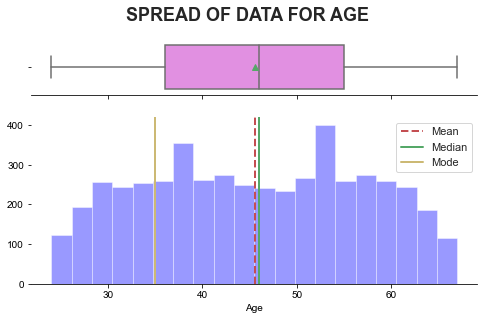

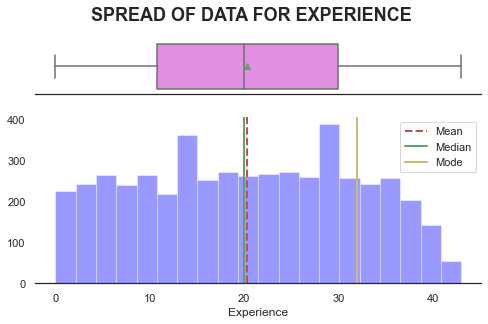

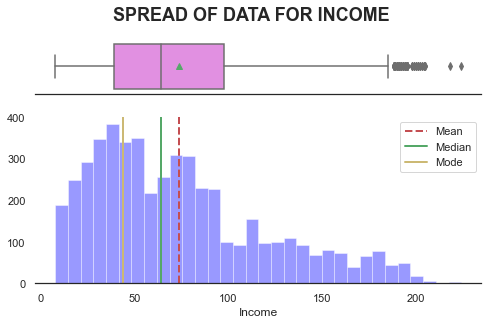

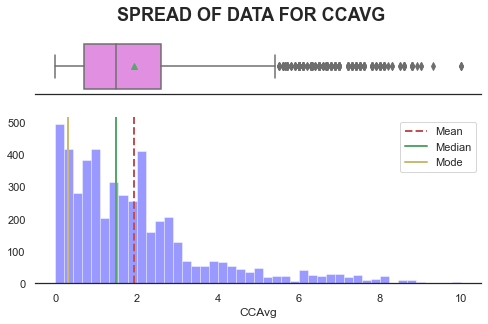

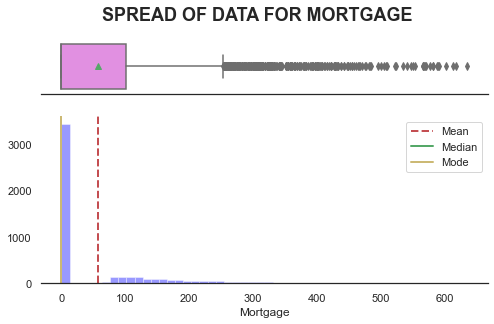

In [21]:
list_col=  ['Age','Experience','Income','CCAvg','Mortgage']
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

**'Age' và 'Experience': their distribution is quite similar - there may be strong correlation.\
'Income' has right skewed distribution, most customers have income below 100.000 USD. There are a lot of outliers with very high income level.\
'CCAvg' distribution generally has similar shape with 'Income', which is consistent with the fact.\
'Mortgage' also has right skewed distribution. Most customers do not have mortgage loan.**

# Customer segmentation based on their age

In [22]:
df['Agebin'] = pd.cut(df['Age'], bins = [0, 30, 40, 50, 60, 100], labels = ['18-30', '31-40', '41-50', '51-60', '60-100'])

# Customer segmentation based on their income

In [23]:
df["Income_group"] = pd.cut(
    x=df["Income"],
    bins=[0, 50, 140, 224],
    labels=["Lower", "Middle", "High"],
)

# Customer segmentation based on their spending level

In [24]:
df["Spending_group"] = pd.cut( x=df["CCAvg"], bins=[0.00000, 0.70000, 2.50000, 10.00000],
    labels=["Low", "Medium", "High"],include_lowest=True ,
)

# Check the distribution of Categorical features

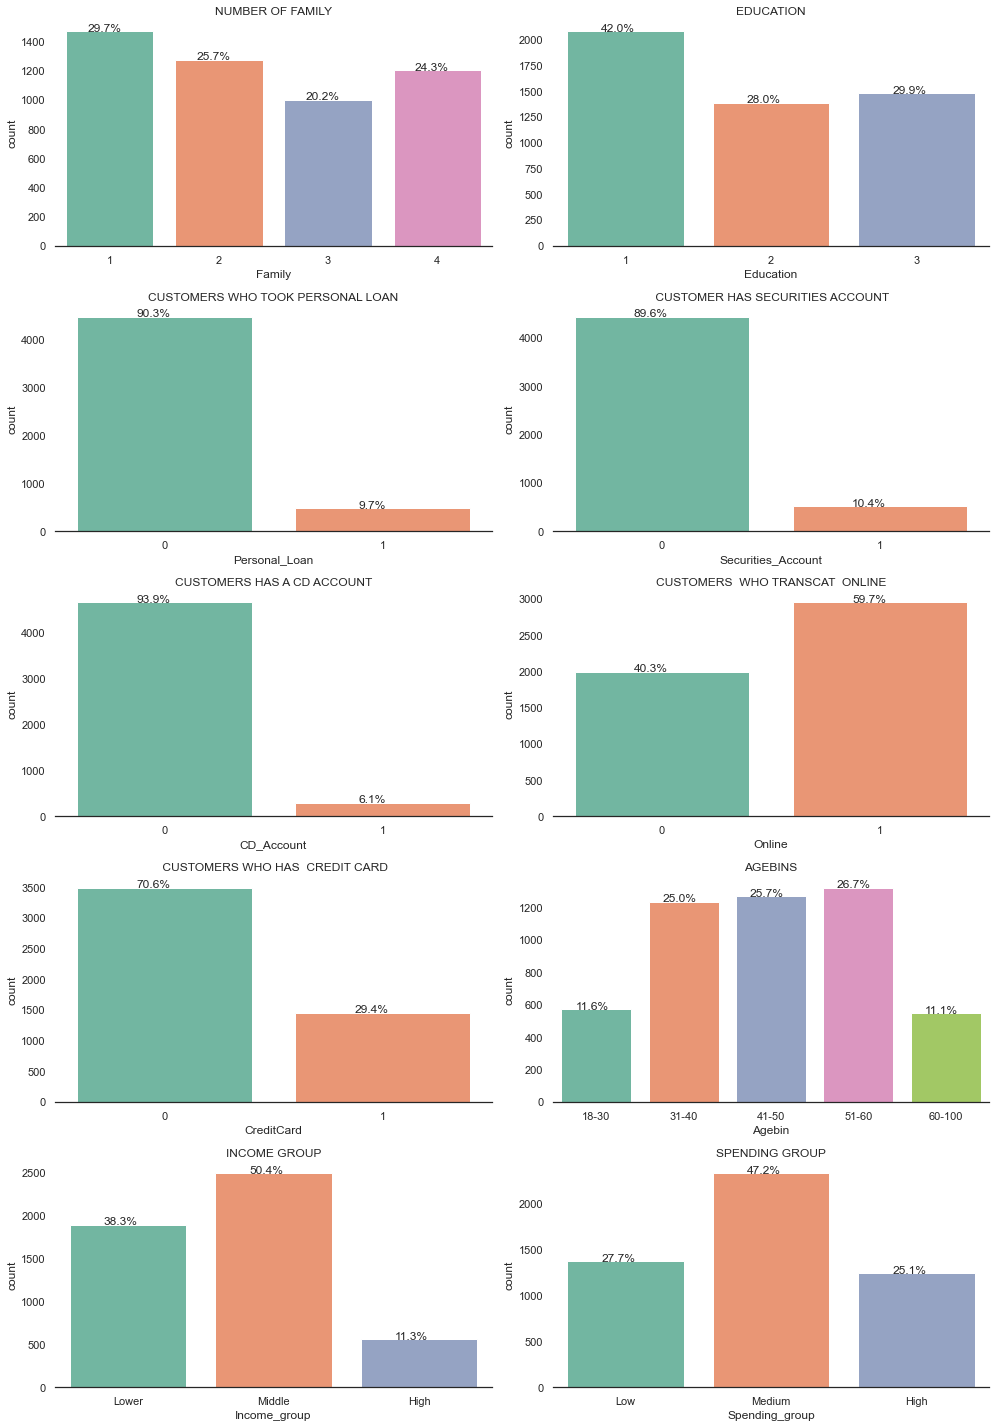

In [25]:
# Making a list of all categorical variables
cat_columns = ['Family','Education','Personal_Loan','Securities_Account',
               'CD_Account','Online','CreditCard','Agebin','Income_group','Spending_group']
title=['Number of Family','Education','Customers who took Personal Loan',
       ' Customer has Securities Account','Customers has a CD Account',
       'Customers  who transcat  Online',' Customers who has  Credit Card','Agebins',"Income group",'Spending group']
plt.figure(figsize=(14,20))

sns.set_theme(style="white") # just trying to make visualisation better. This will set background to white
#list_palette=['Blues_r','Greens_r','Purples_r','Reds_r','Blues_r','Greens_r','Purples_r','Reds_r','Blues_r']

for i, variable in enumerate(cat_columns):#tạo ra vòng lặp
    plt.subplot(5,2,i+1)
    order = df[variable].value_counts(ascending=False).index   
    #sns.set_palette(list_palette[i]) # to set the palette
    sns.set_palette('Set2')
    ax=sns.countplot(x=df[variable], data=df )
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[variable]))
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plt.annotate(percentage, (x, y),ha='center')
    plt.tight_layout()
    plt.title(title[i].upper())

**'Family': Most customers (29.7%) are single. If customer has married, high probability that he/she has no children or 2 children.\
'Education': Most customers (42%) hold bachelor degree. The proportions of customers who hold master or PhD degree are quite the same.\
'Personal Loan', 'Securities_Account': roughly 90% customers do not have any personal loan, security account at the bank or CD account.\
'Online': number of customers who use internet banking is slightly higher than who use traditional bank service at the office.\
'Credit Card': the number of customers using credit cards is outnumbered by the number of customers who do not use.\
'Agebin': most customers are people of working age.\
'Income Group': half of customers have normal income level. Just 11.3% customers at the bank have considerably high income.\
'CCAvg': half of customers spend at normal level every month.**

# Correlation Matrix

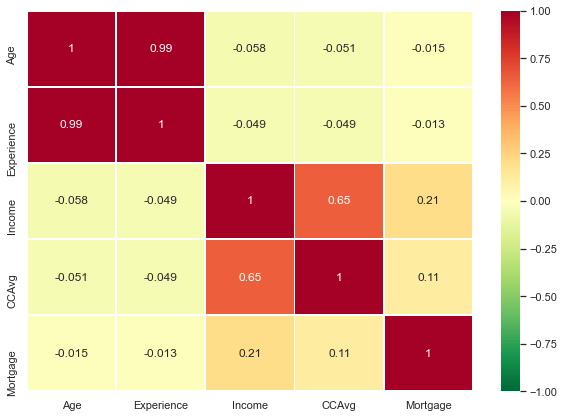

In [26]:
corr= df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot= True,vmin=-1,vmax=1, cmap='RdYlGn_r',linewidths=0.75)
plt.show()

**'Age' and 'Experience' have strongest correlation with 0,99 which is logical.\
'Income' and 'CCAvg' have relatively high correlation with 0.65.\
'Income' and 'CCAvg' have positive correlation with 'Mortgage'.\
No obvious relationships seen with other variables.**

# Compare the distribution of Numerical features based on two groups of Target variables: Customers have Personal Loan and Customers do not have Personal Loan

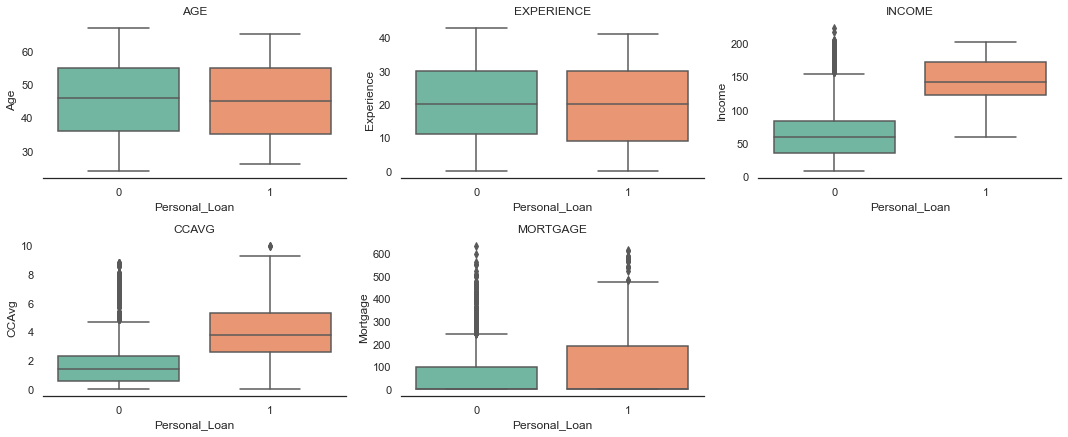

In [27]:
numeric_columns = ['Age','Experience','Income','CCAvg','Mortgage']
plt.figure(figsize=(15,30))

sns.set_palette(sns.color_palette("Set2", 8))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        
        sns.boxplot(x='Personal_Loan',y= df[variable], data=df)     
        sns.despine(top=True,right=True,left=True) # to remove side line from graph
        plt.tight_layout()
        plt.title(variable.upper())
# For all numerical variables with Personal_Loan

**'Age' and 'Experience': there are no obvious difference in distribution between two groups.\
'Income' and 'CCAvg': Customers who have Personal Loan have substantially higher income and spending amount in credit card. However, there are some customers with really high income but they do not have Personal Loan. Addtionally, there are a lot of outliers in "0" side of Personal Loan.\
'Mortgage': The "No Personal Loan" group has substantial outliers.**

# # Compare the distribution of Categorical features based on two groups of Target variables: Customers have Personal Loan and Customers do not have Personal Loan

In [28]:
# Function to plot stacked bar chart
def stacked_plot(x):
    sns.set_palette(sns.color_palette("Set2", 8))
    tab1 = pd.crosstab(x,df['Personal_Loan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['Personal_Loan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Borrowed Loan",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    #plt.legend(labels)
    plt.show()

Personal_Loan     0    1   All
Family                        
1              1363  107  1470
2              1168  106  1274
3               868  133  1001
4              1069  134  1203
All            4468  480  4948
------------------------------------------------------------------------------------------------------------------------


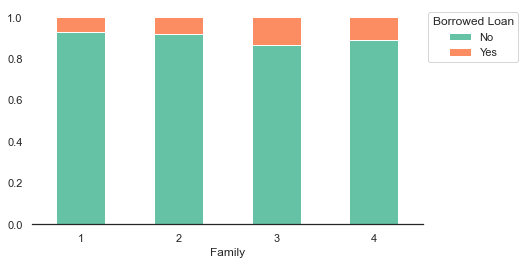

Personal_Loan     0    1   All
Education                     
1              1987   93  2080
2              1205  182  1387
3              1276  205  1481
All            4468  480  4948
------------------------------------------------------------------------------------------------------------------------


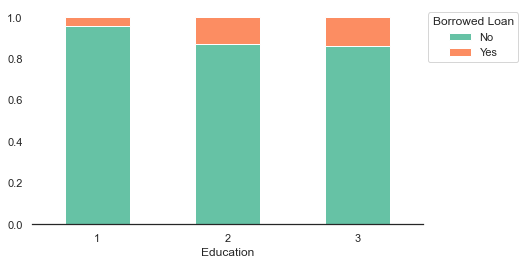

Personal_Loan          0    1   All
Securities_Account                 
0                   4012  420  4432
1                    456   60   516
All                 4468  480  4948
------------------------------------------------------------------------------------------------------------------------


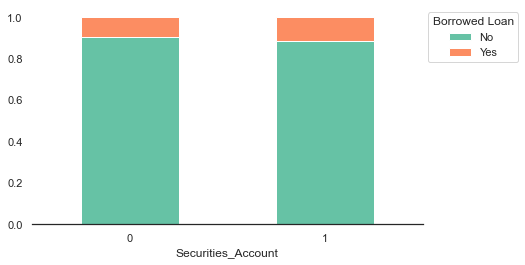

Personal_Loan     0    1   All
CD_Account                    
0              4306  340  4646
1               162  140   302
All            4468  480  4948
------------------------------------------------------------------------------------------------------------------------


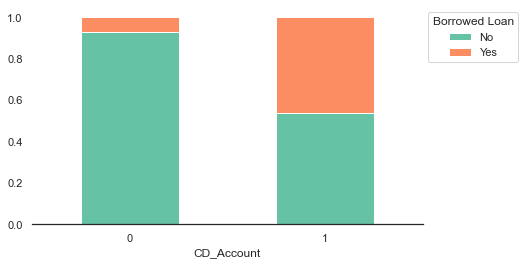

Personal_Loan     0    1   All
CreditCard                    
0              3156  337  3493
1              1312  143  1455
All            4468  480  4948
------------------------------------------------------------------------------------------------------------------------


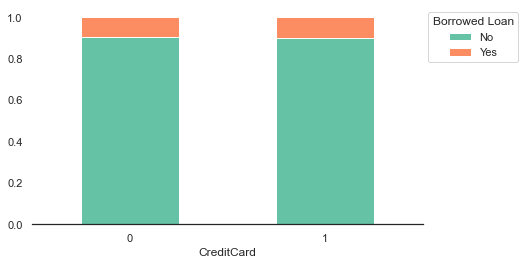

Personal_Loan     0    1   All
Online                        
0              1805  189  1994
1              2663  291  2954
All            4468  480  4948
------------------------------------------------------------------------------------------------------------------------


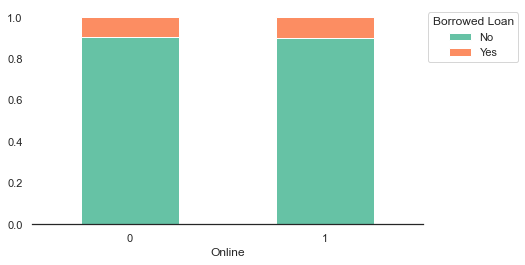

Personal_Loan     0    1   All
Agebin                        
18-30           506   66   572
31-40          1118  118  1236
41-50          1148  122  1270
51-60          1208  115  1323
60-100          488   59   547
All            4468  480  4948
------------------------------------------------------------------------------------------------------------------------


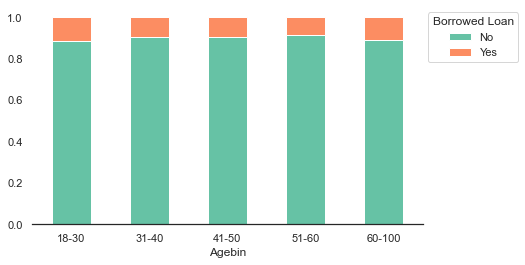

Personal_Loan     0    1   All
Income_group                  
Lower          1893    0  1893
Middle         2273  223  2496
High            302  257   559
All            4468  480  4948
------------------------------------------------------------------------------------------------------------------------


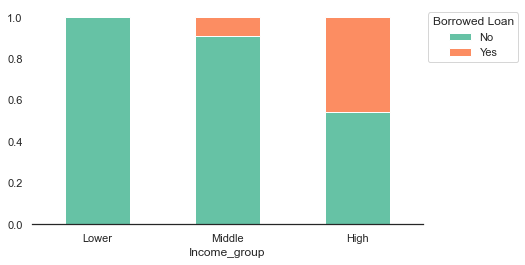

Personal_Loan      0    1   All
Spending_group                 
Low             1334   39  1373
Medium          2255   79  2334
High             879  362  1241
All             4468  480  4948
------------------------------------------------------------------------------------------------------------------------


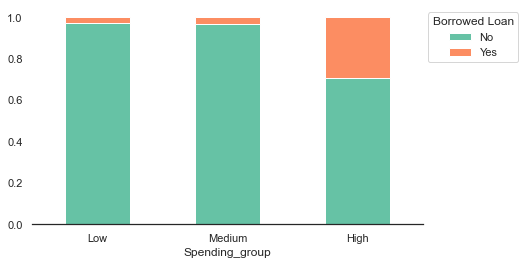

In [29]:
cat_columns=['Family','Education','Securities_Account','CD_Account','CreditCard','Online','Agebin','Income_group','Spending_group']
for i, variable in enumerate(cat_columns):
       stacked_plot(df[variable])

**Customers who have family size of 3 or 4 tend to have more personal loan. This makes sense because family need more money every month to live when there are more people in the family.\
Customers who hold Master or PhD degree have higher probability to take a loan than customers who hold Bachelor degree.\
Customers who have Certificate of Deposit account have a propensity for taking loans. In contrast, there are no differences of probability of taking loan whether customers have security account or not and whether customers have credit account or not.\
Customers who use internet banking services or traditional banking services have no difference in probability of taking loan.\
There are no significant difference in probability of taking loans between age groups. On the contrary, customers in high income segment or high spending segment have significantly higher probability of taking loan.**

# Conduct final steps in Data Preprocessing before deploying models such as encoding features, splitting features into Predictors and Target column

**Convert features which have 0 and 1 value only into numerical types before use function get_dummies.**

In [30]:
list_features = ['Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', ]
for i in list_features:
    df[i] = pd.to_numeric(df[i])

In [31]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Agebin,Income_group,Spending_group
0,25,1,49,91,4,1.6,1,0,0,1,0,0,0,18-30,Lower,Medium
1,45,19,34,90,3,1.5,1,0,0,1,0,0,0,41-50,Lower,Medium
2,39,15,11,94,1,1.0,1,0,0,0,0,0,0,31-40,Lower,Medium
3,35,9,100,94,1,2.7,2,0,0,0,0,0,0,31-40,Middle,High
4,35,8,45,91,4,1.0,2,0,0,0,0,0,1,31-40,Lower,Medium


In [32]:
df.dtypes

Age                      int64
Experience               int64
Income                   int64
ZIPCode               category
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal_Loan            int64
Securities_Account       int64
CD_Account               int64
Online                   int64
CreditCard               int64
Agebin                category
Income_group          category
Spending_group        category
dtype: object

**Remove segmented variables due to redundancy**

In [33]:
df.drop(['Agebin', 'Income_group', 'Spending_group'], axis=1, inplace=True)

In [34]:
## Defining X and Y variables
X = df.drop(['Personal_Loan'], axis=1) #dropping the dependent variable
Y = df[['Personal_Loan']]

In [35]:
#Convert categorical variables to dummy variables
X = pd.get_dummies(X)

In [36]:
X.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_90,ZIPCode_91,ZIPCode_92,ZIPCode_93,ZIPCode_94,ZIPCode_95,ZIPCode_96,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,1,49,1.6,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
1,45,19,34,1.5,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,35,9,100,2.7,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
4,35,8,45,1.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [37]:
# Split dataset into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.30,random_state=29)

# Statistics method: Logistic Regression

In [38]:
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred_lr = logit_model.predict(X_test)

In [40]:
cf_matrix = confusion_matrix(y_test, y_pred_lr)
print(cf_matrix)

[[1326   15]
 [  43  101]]


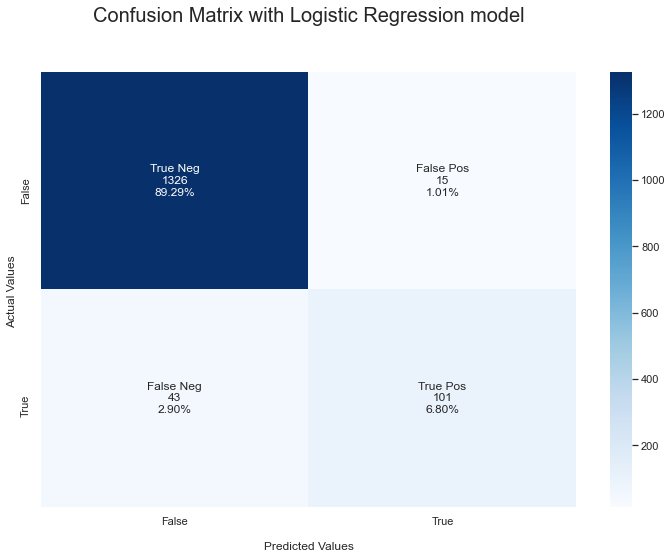

In [41]:
plt.figure(figsize=(12,8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with Logistic Regression model\n\n',fontsize=20);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [42]:
def scores(model):
    """ model : classifier to predict X values """
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("Accuracy on training set : ",metrics.accuracy_score(y_train,y_pred_train))
    print("Accuracy on test set : ",metrics.accuracy_score(y_test,y_pred_test))

    print("\nRecall on training set : ",metrics.recall_score(y_train,y_pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,y_pred_test))
    
    print("\nPrecision on training set : ",metrics.precision_score(y_train,y_pred_train))
    print("Precision on test set : ",metrics.precision_score(y_test,y_pred_test))
    
    print("\nF1 on training set : ",metrics.f1_score(y_train,y_pred_train))
    print("F1 on test set : ",metrics.f1_score(y_test,y_pred_test))

In [43]:
scores(logit_model)

Accuracy on training set :  0.9592838579266532
Accuracy on test set :  0.960942760942761

Recall on training set :  0.6636904761904762
Recall on test set :  0.7013888888888888

Precision on training set :  0.8884462151394422
Precision on test set :  0.8706896551724138

F1 on training set :  0.7597955706984667
F1 on test set :  0.7769230769230769


In [44]:
metrics.roc_auc_score(y_test, y_pred_lr)

0.8451016032811335

# Machine Learning method

# Decision Tree model

In [45]:
# Parameters are set arbitrarily. We can conduct hyperparameter tuning to improve the performance of Decision Tree model.
Dt = DecisionTreeClassifier(criterion='gini', splitter = 'best', min_samples_leaf = 5,
                            class_weight={0:0.15,1:0.85}, random_state=29)
Dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, min_samples_leaf=5,
                       random_state=29)

In [46]:
y_predict_Dt = Dt.predict(X_test)

In [47]:
cf_matrix = confusion_matrix(y_test, y_predict_Dt)
print(cf_matrix)

[[1321   20]
 [  13  131]]


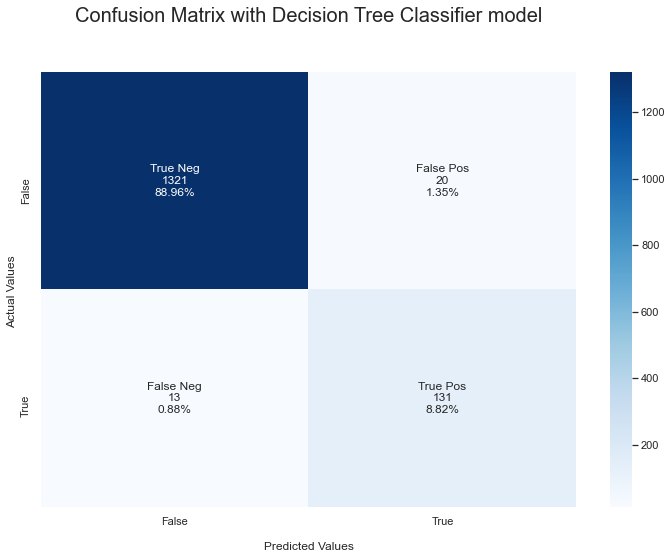

In [48]:
plt.figure(figsize=(12,8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with Decision Tree Classifier model\n\n',fontsize=20);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [49]:
scores(Dt)

Accuracy on training set :  0.9861391856771585
Accuracy on test set :  0.9777777777777777

Recall on training set :  1.0
Recall on test set :  0.9097222222222222

Precision on training set :  0.875
Precision on test set :  0.8675496688741722

F1 on training set :  0.9333333333333333
F1 on test set :  0.888135593220339


In [50]:
metrics.roc_auc_score(y_test, y_predict_Dt)

0.9474039895600298

# Visualize Decision Tree result

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_90', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Family_1', 'Family_2', 'Family_3', 'Family_4', 'Education_1', 'Education_2', 'Education_3']


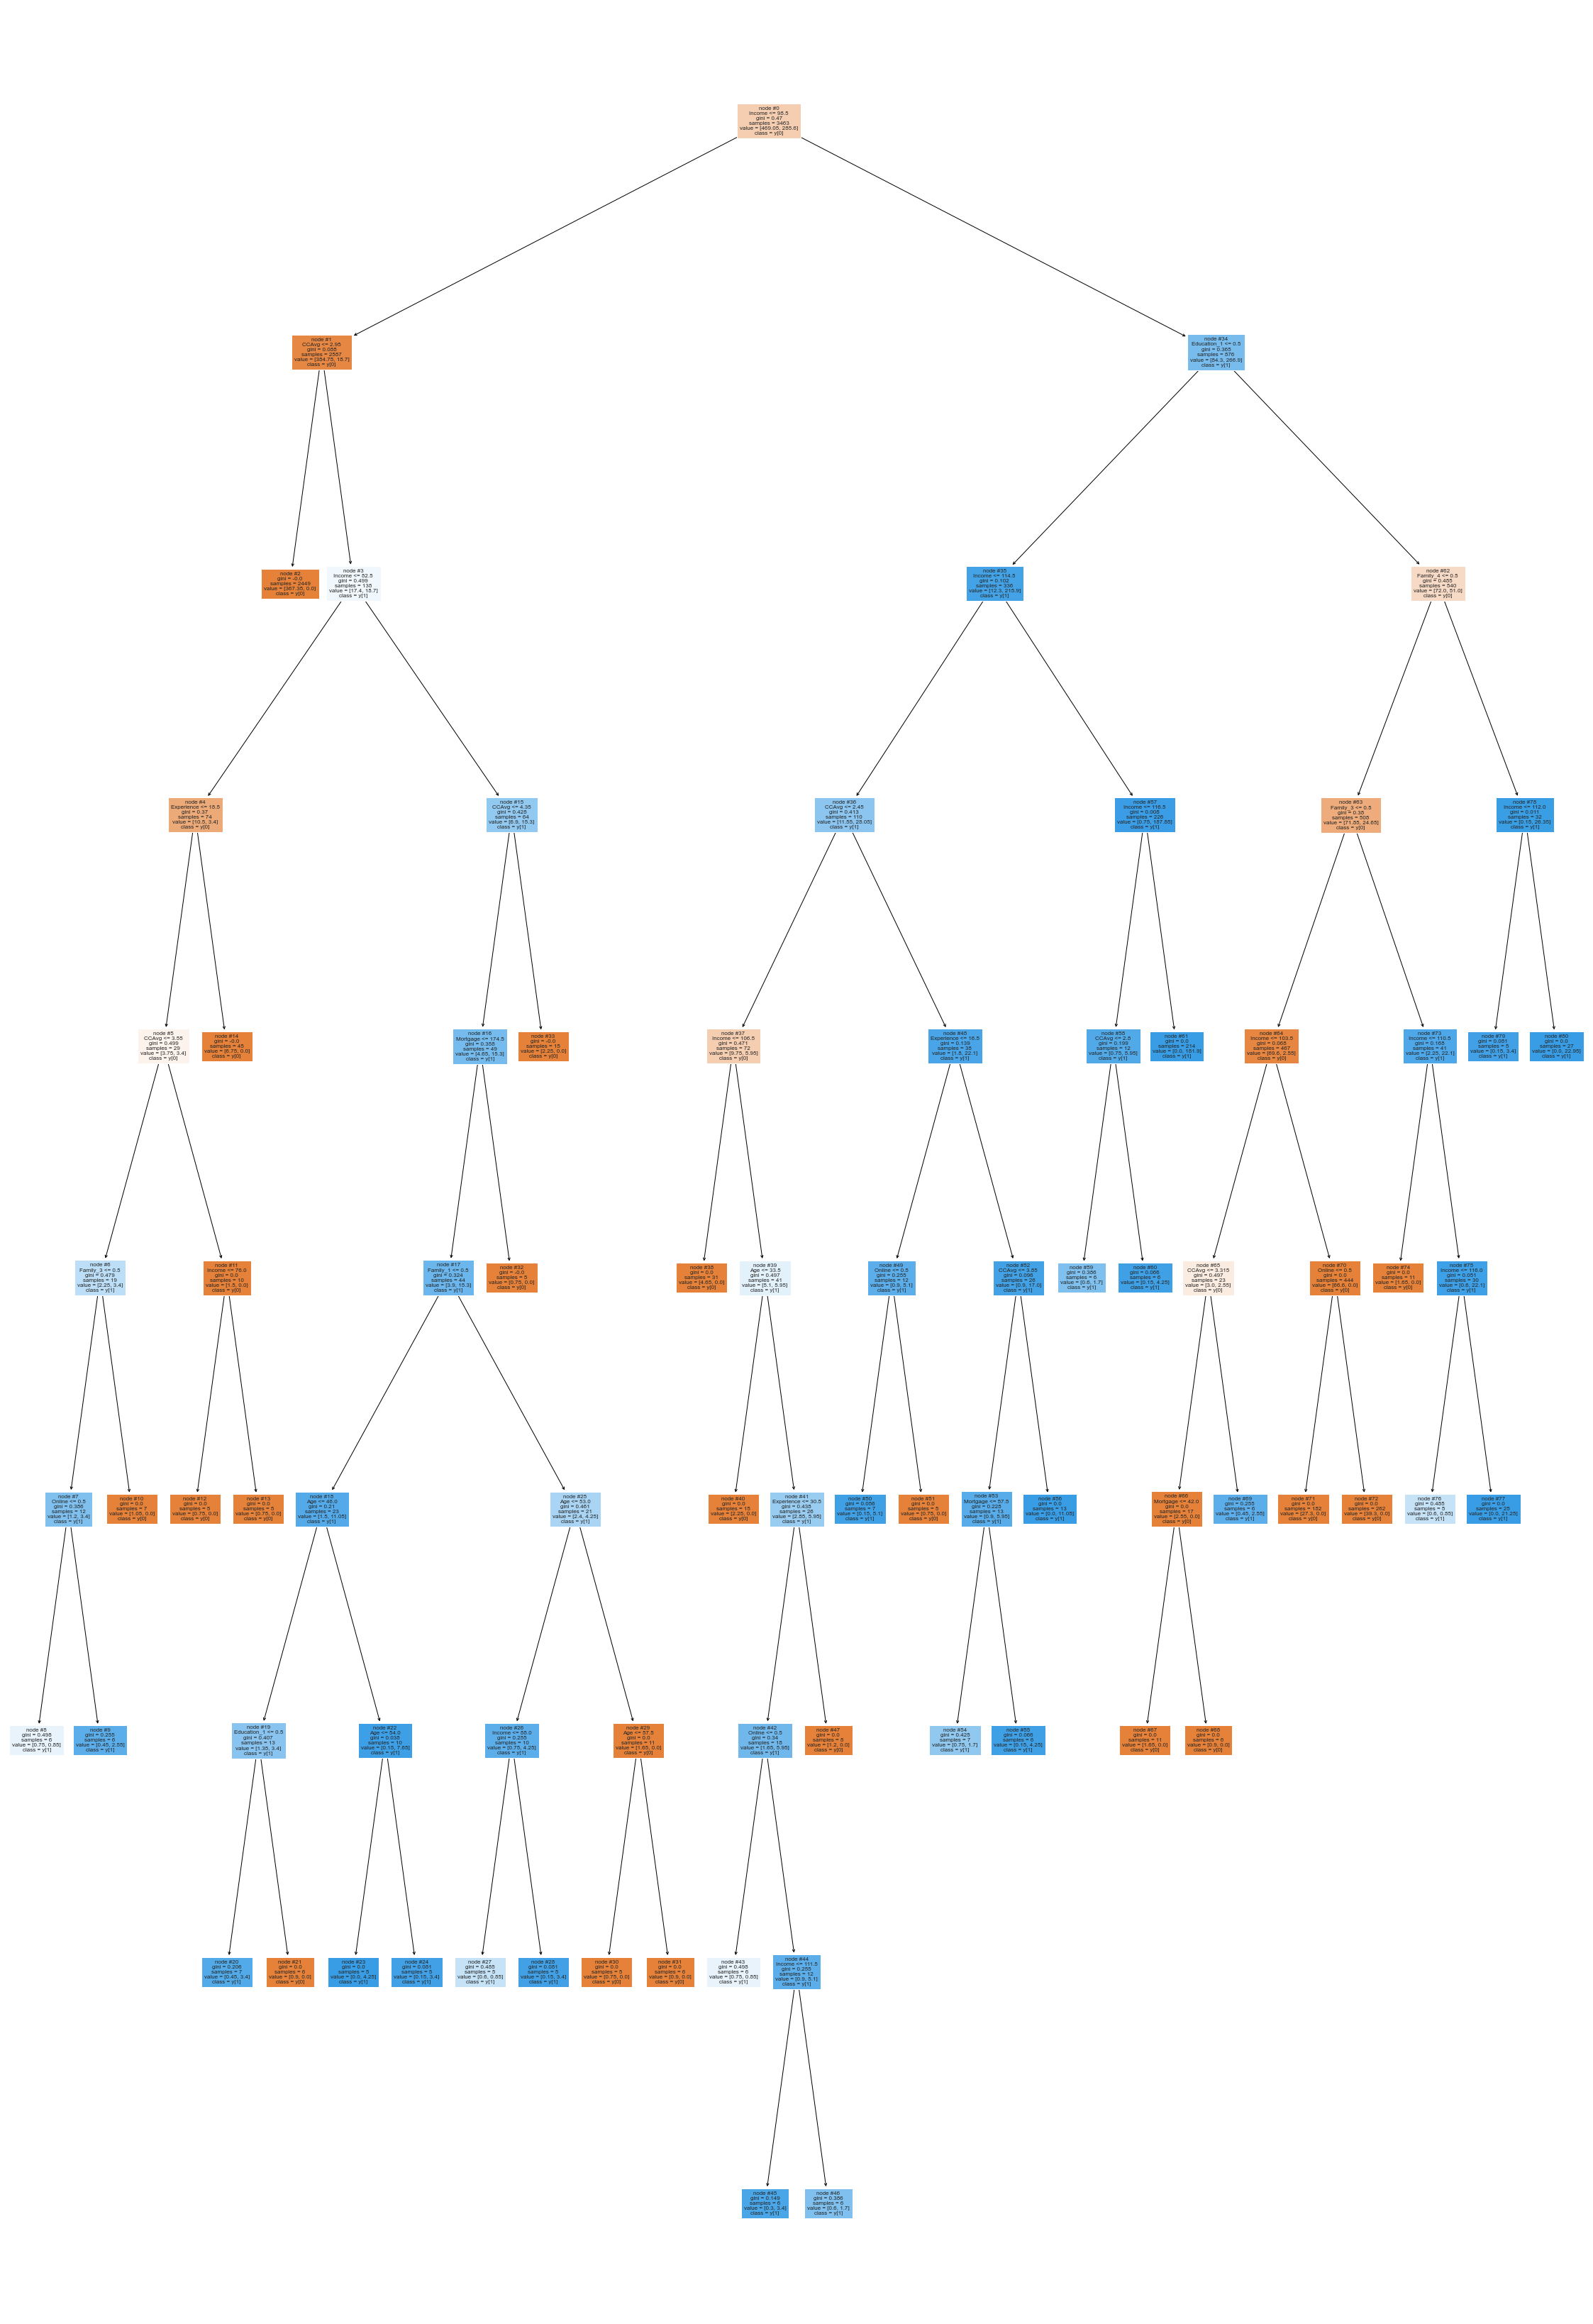

In [51]:
column_names = list(X.columns)
print(column_names)
plt.figure(figsize=(40,60))
out = tree.plot_tree(Dt,feature_names=column_names,filled=True,fontsize=8,node_ids=True,class_names=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.savefig('png.png')
plt.show()

# Decision Tree result in form of Text

In [52]:
# Text report showing the rules of a decision tree -
print(tree.export_text(Dt,feature_names=column_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [367.35, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 82.50
|   |   |   |--- Experience <= 18.50
|   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.75, 0.85] class: 1
|   |   |   |   |   |   |--- Online >  0.50
|   |   |   |   |   |   |   |--- weights: [0.45, 2.55] class: 1
|   |   |   |   |   |--- Family_3 >  0.50
|   |   |   |   |   |   |--- weights: [1.05, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.55
|   |   |   |   |   |--- Income <= 76.00
|   |   |   |   |   |   |--- weights: [0.75, 0.00] class: 0
|   |   |   |   |   |--- Income >  76.00
|   |   |   |   |   |   |--- weights: [0.75, 0.00] class: 0
|   |   |   |--- Experience >  18.50
|   |   |   |   |--- weights: [6.75, 0.00] class: 0
|   |   |--- Income >  82.50
|   |   |   |--- CCAvg <= 4.35
|   |   |   |   |--- Mortgage <= 174.50


# Important features Decision Tree model indicates

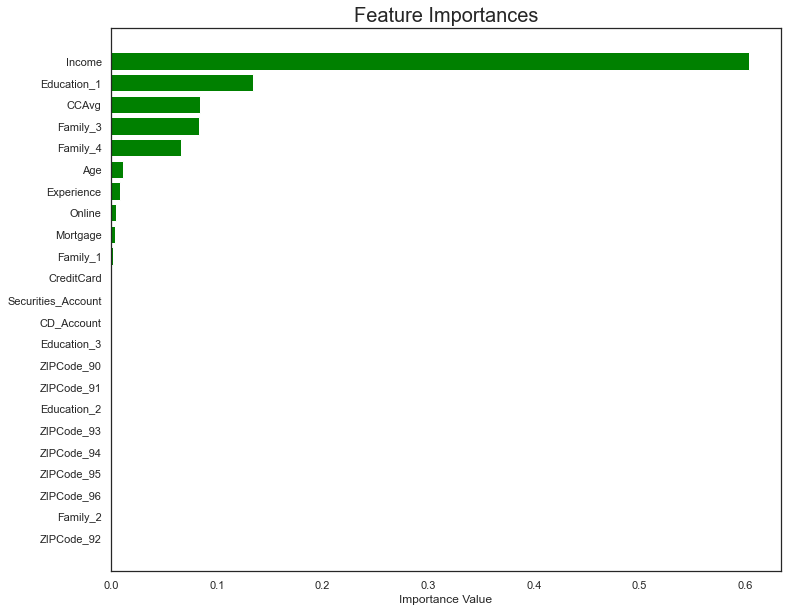

In [53]:
importance = Dt.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(12,10))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importance[indices], color='green', align='center')
plt.yticks(range(len(indices)), [column_names[i] for i in indices])
plt.xlabel('Importance Value')
plt.savefig('DTFI.png')
plt.show()

# To determine probability of taking loan of customer, we can consider some factors below:
**Income level.\
Whether customers hold Bachelor degree or not.\
Monthly spending habit.\
Size of family.**

# The critical goal of the bank is to exactly target customers who actually buy loan to make as much of profit as possible. So, the good model must have high Recall without sacrificing too much other in evaluation measurements

# GridSearchCV is one of the most effective tool to find optimal model with highest Recall 

In [54]:
from sklearn.model_selection import GridSearchCV
# Choose the type of classifier. 
classifier = DecisionTreeClassifier(random_state=29,class_weight = {0:.15,1:.85}) #adding classweights 

#Defining the Hyperparameters

parameters = {'max_depth': np.arange(1,11), 
            'criterion': ['gini','entropy'],
            'splitter': ['best','random'],
            'max_features': ['log2','sqrt'],
            'min_samples_leaf': np.arange(1,11)}

# Type of scoring used to compare parameter combinations
recall_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search with the above parameters
grid_obj = GridSearchCV(classifier, parameters, scoring=recall_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set to the best combination of parameters
classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=3,
                       max_features='log2', min_samples_leaf=2,
                       random_state=29)

In [55]:
y_predict_Dt_2 = classifier.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_predict_Dt_2)
print(cf_matrix)

[[1068  273]
 [   4  140]]


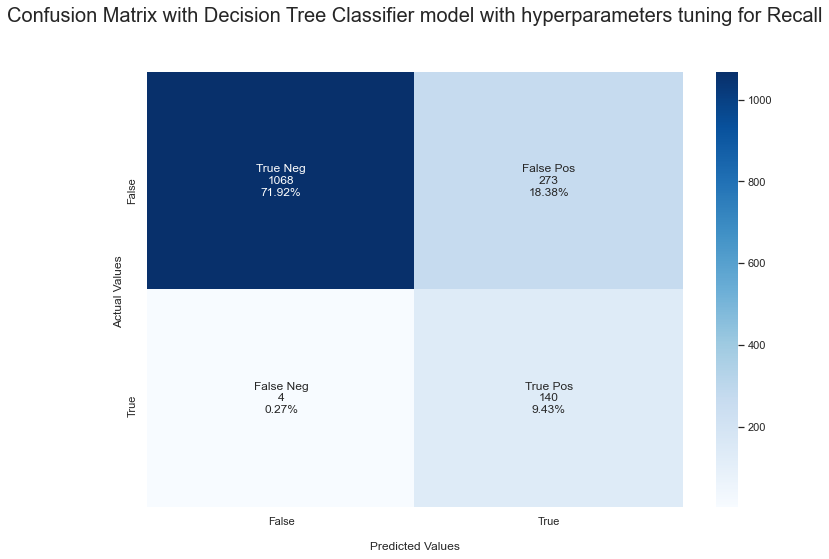

In [56]:
plt.figure(figsize=(12,8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with Decision Tree Classifier model with hyperparameters tuning for Recall\n\n',fontsize=20);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [57]:
scores(classifier)

Accuracy on training set :  0.8099913369910482
Accuracy on test set :  0.8134680134680135

Recall on training set :  0.9880952380952381
Recall on test set :  0.9722222222222222

Precision on training set :  0.3367139959432049
Precision on test set :  0.3389830508474576

F1 on training set :  0.5022692889561271
F1 on test set :  0.5026929982046678


In [58]:
metrics.roc_auc_score(y_test, y_predict_Dt_2)

0.8843214019388517

**To achieve the goal of exactly catching customers who actually buy loans (high Recall score), we must sacrifice other evaluations like Accuracy, Precision or F1-score and even ROC_AUC score.**

# We can see the improvement of Recall when tuning hyperparameters of Decision Tree model. However, one inherent weakness of Decision Tree model is Overfitting. To avoid this problem, Random Forest comes in play.

In [59]:
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

# Hyperparameter tuning to find out Random Forest model with optimal Recall

In [60]:
def grid_search_wrapper(refit_score='recall_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [61]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'max_depth': 25, 'max_features': 10, 'min_samples_split': 3, 'n_estimators': 300}

Confusion matrix of Random Forest optimized for recall_score on the test data:
     pred_neg  pred_pos
neg      1341         0
pos        17       127


In [62]:
rf = RandomForestClassifier(max_depth= 15, max_features= 20, min_samples_split = 5, n_estimators = 100, random_state=29)
rf.fit(X_train,y_train)
y_predict_Rf = rf.predict(X_test)

In [63]:
cf_matrix = confusion_matrix(y_test, y_predict_Rf)
print(cf_matrix)

[[1341    0]
 [  14  130]]


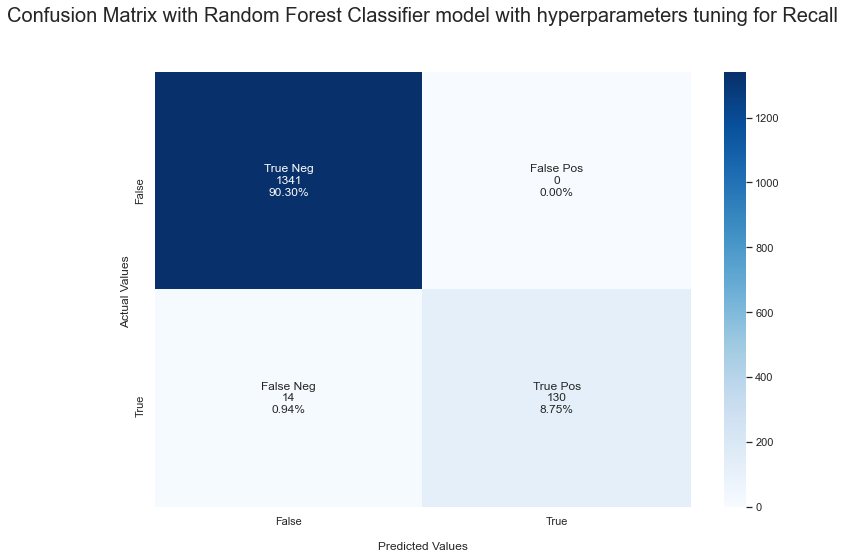

In [64]:
plt.figure(figsize=(12,8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with Random Forest Classifier model with hyperparameters tuning for Recall\n\n',fontsize=20);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [65]:
scores(rf)

Accuracy on training set :  0.9988449321397632
Accuracy on test set :  0.9905723905723905

Recall on training set :  0.9880952380952381
Recall on test set :  0.9027777777777778

Precision on training set :  1.0
Precision on test set :  1.0

F1 on training set :  0.9940119760479043
F1 on test set :  0.9489051094890512


In [66]:
metrics.accuracy_score(y_test, y_predict_Rf)

0.9905723905723905

In [67]:
metrics.roc_auc_score(y_test, y_predict_Rf)

0.9513888888888888

In [68]:
# view the feature scores
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Income                0.355937
Education_1           0.323240
Family_4              0.084722
CCAvg                 0.073974
Family_3              0.063653
Education_2           0.018368
Age                   0.014748
Experience            0.012555
Education_3           0.012547
CD_Account            0.010148
Mortgage              0.006776
Family_2              0.004376
ZIPCode_93            0.003297
Online                0.003232
Family_1              0.002659
CreditCard            0.001897
Securities_Account    0.001613
ZIPCode_92            0.001499
ZIPCode_91            0.001465
ZIPCode_94            0.001151
ZIPCode_95            0.001108
ZIPCode_90            0.001033
ZIPCode_96            0.000000
dtype: float64

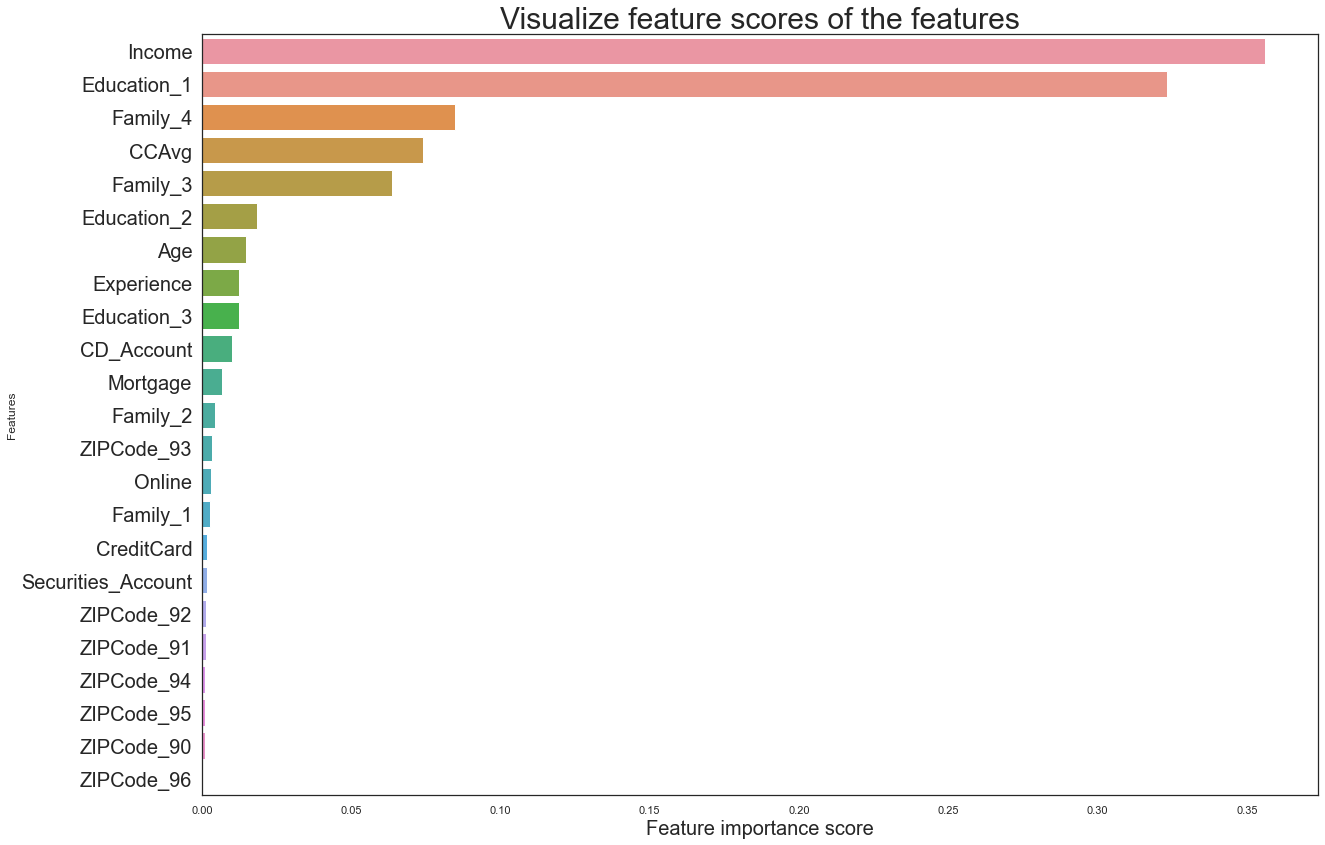

In [69]:
f, ax = plt.subplots(figsize=(20, 14))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df)
ax.set_title("Visualize feature scores of the features",fontsize = 30)
ax.set_yticklabels(feature_scores.index, fontsize=20)
ax.set_xlabel("Feature importance score", fontsize=20)
ax.set_ylabel("Features")
plt.show()

# Are important features in two model similar?

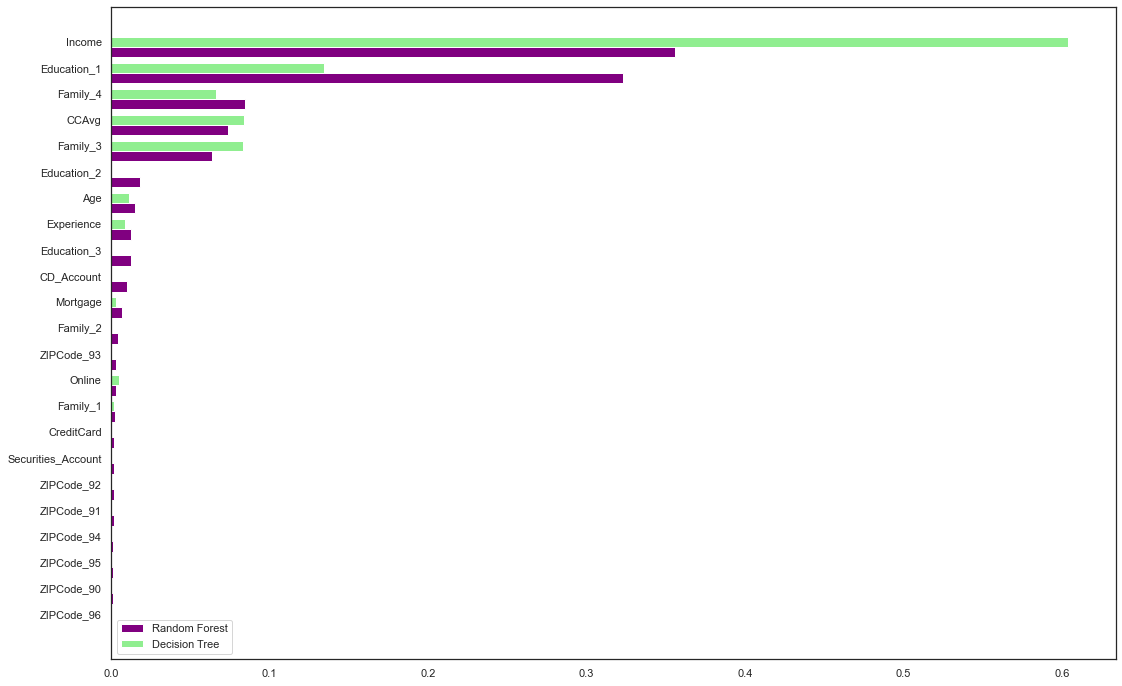

In [70]:
feature_importance=pd.DataFrame({
    'rfc':rf.feature_importances_,
    'dt':Dt.feature_importances_},index=X.columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,12))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

**Generally speaking, important features evaluated by Decision Tree and Random Forest look  similar, especially 5 most important features. Just a little bit difference in order.**

In [71]:
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_predict_Dt)
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_predict_Rf)
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_predict_Dt_2)
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred_lr)

In [72]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 1}

mpl.rc('font', **font)

In [73]:
plt.rcParams.update({'font.size': 52})

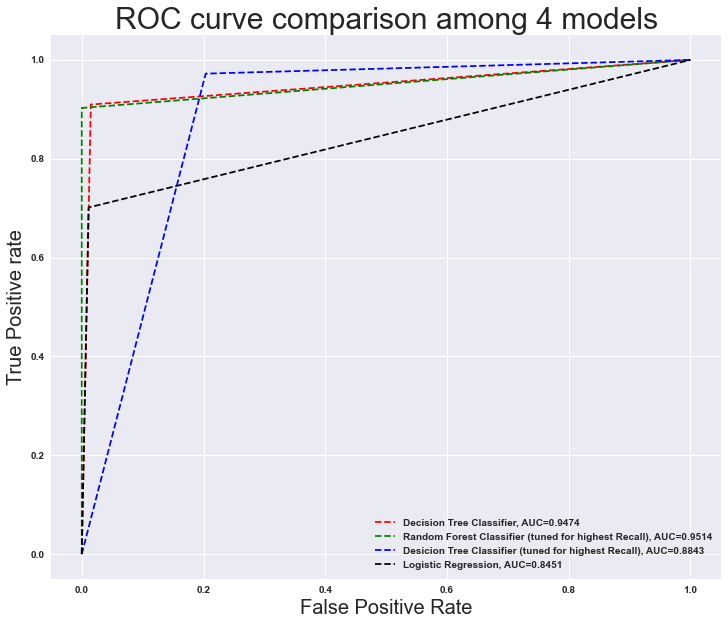

In [74]:
plt.style.use('seaborn')
plt.figure(0, figsize = (12,10)).clf()
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Decision Tree Classifier, AUC='+str(round(metrics.roc_auc_score(y_test, y_predict_Dt), 4)))
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest Classifier (tuned for highest Recall), AUC='+str(round(metrics.roc_auc_score(y_test, y_predict_Rf), 4)))
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='Desicion Tree Classifier (tuned for highest Recall), AUC='+str(round(metrics.roc_auc_score(y_test, y_predict_Dt_2), 4)))
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='Logistic Regression, AUC='+str(round(metrics.roc_auc_score(y_test, y_pred_lr), 4)))
plt.title('ROC curve comparison among 4 models', fontsize = 30)
# x label
plt.xlabel('False Positive Rate', fontsize = 20)
# y label
plt.ylabel('True Positive rate', fontsize = 20)

plt.legend(loc='best')
plt.show()

**If goal of the bank is just catching as many as customers who actually buy loan, Decision Tree Classifier model tuned for Recall is the best candidate.\
In case of the losses from False Positive and False Negative are the same, we should use Random Forest Classifier model tuned for Recall because this model has highest AUC score (0.9514).**

# In this project, we can see that Machine Learning tree-based model outperformed Statistics model (Logistic Regression)